In [1]:
# -*- coding: latin-1 -*-
"""
    Código 2.1 - Reconocimiento facial en una imagen estática
    Este programa identifica varios rostros de físicos famosos en fotografías.
 
    Escrito por Glare y Transductor
    www.robologs.net
"""
import cv2
import face_recognition

In [2]:
from PIL import Image
import numpy as np

In [3]:
#Cargamos las imagenes con los rostros que queremos identificar:
imagen_einstein = face_recognition.load_image_file("einstein.jpg")
imagen_paul = face_recognition.load_image_file("paul.jpg")
imagen_planck = face_recognition.load_image_file("planck.jpg")

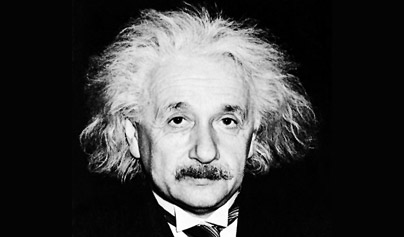

In [4]:
Image.fromarray(imagen_einstein, 'RGB')

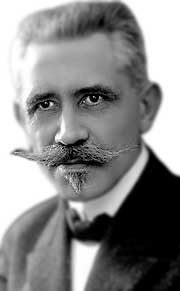

In [5]:
Image.fromarray(imagen_paul, 'RGB')

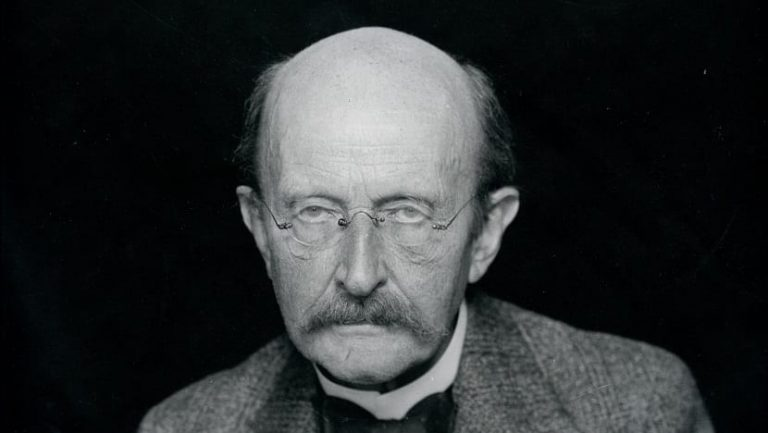

In [6]:
Image.fromarray(imagen_planck, 'RGB')

In [7]:
#El siguiente paso es extraer los 'encodings' de cada imagen.
#Los encodings son las características únicas de cada rostro que permiten diferenciarlo de otros.
einstein_encodings = face_recognition.face_encodings(imagen_einstein)[0]
paul_encodings = face_recognition.face_encodings(imagen_paul)[0]
planck_encodings = face_recognition.face_encodings(imagen_planck)[0]

In [8]:
#Creamos un array con los encodings y otro con sus respectivos nombres:
encodings_conocidos = [
    einstein_encodings,
    paul_encodings,
    planck_encodings
]
nombres_conocidos = [
    "Albert Einstein",
    "Paul Langevin",
    "Max Planck"
]

In [9]:
#Cargamos una fuente de texto:
font = cv2.FONT_HERSHEY_COMPLEX

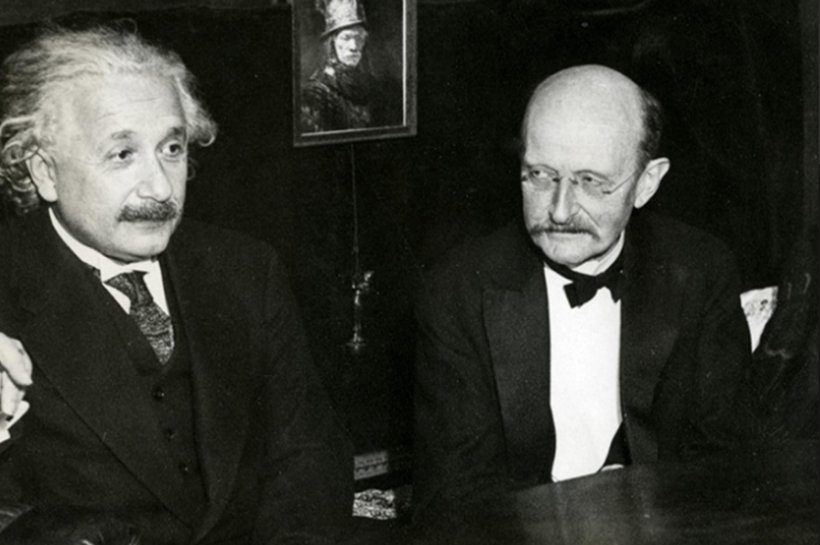

In [10]:
#Cargamos la imagen donde hay que identificar los rostros:
img = face_recognition.load_image_file('imagen_input.jpg')
#(Para probar la segunda imagen hay que cambiar el argumento de la función por 'imagen_input2.jpg')

Image.fromarray(img, 'RGB')

In [11]:
# Definir tres arrays, que servirán para guardar los parámetros de los rostros que se encuentren en la imagen:
loc_rostros = [] #Localizacion de los rostros en la imagen (contendrá las coordenadas de los recuadros que las contienen)
encodings_rostros = [] #Encodings de los rostros
nombres_rostros = [] #Nombre de la persona de cada rostro

In [12]:
#Localizamos cada rostro de la imagen y extraemos sus encodings:
loc_rostros = face_recognition.face_locations(img)
encodings_rostros = face_recognition.face_encodings(img, loc_rostros)

In [13]:
#Recorremos el array de encodings que hemos encontrado:
for encoding in encodings_rostros:
 
    #Buscamos si hay alguna coincidencia con algún encoding conocido:
    coincidencias = face_recognition.compare_faces(encodings_conocidos, encoding)
 
    #El array 'coincidencias' es ahora un array de booleanos.
    #Si contiene algun 'True', es que ha habido alguna coincidencia:
    if True in coincidencias:
        #Buscamos el nombre correspondiente en el array de nombres conocidos:
        nombre = nombres_conocidos[coincidencias.index(True)]
 
    #Si no hay ningún 'True' en el array 'coincidencias', no se ha podido identificar el rostro:
    else:
        nombre = "???"
 
    #Añadimos el nombre de la persona identificada en el array de nombres:
    nombres_rostros.append(nombre)

In [14]:
#Dibujamos un recuadro rojo alrededor de los rostros desconocidos, y uno verde alrededor de los conocidos:
for (top, right, bottom, left), nombre in zip(loc_rostros, nombres_rostros):
 
    #Cambiar el color segun el nombre:
    if nombre != "???":
        color = (0,255,0) #Verde
    else:
        color = (0,0,255) #Rojo
 
    #Dibujar los recuadros alrededor del rostro:
    cv2.rectangle(img, (left, top), (right, bottom), color, 2)
    cv2.rectangle(img, (left, bottom - 20), (right, bottom), color, -1)
 
    #Escribir el nombre de la persona:
    cv2.putText(img, nombre, (left, bottom - 6), font, 0.6, (0,0,0), 1)

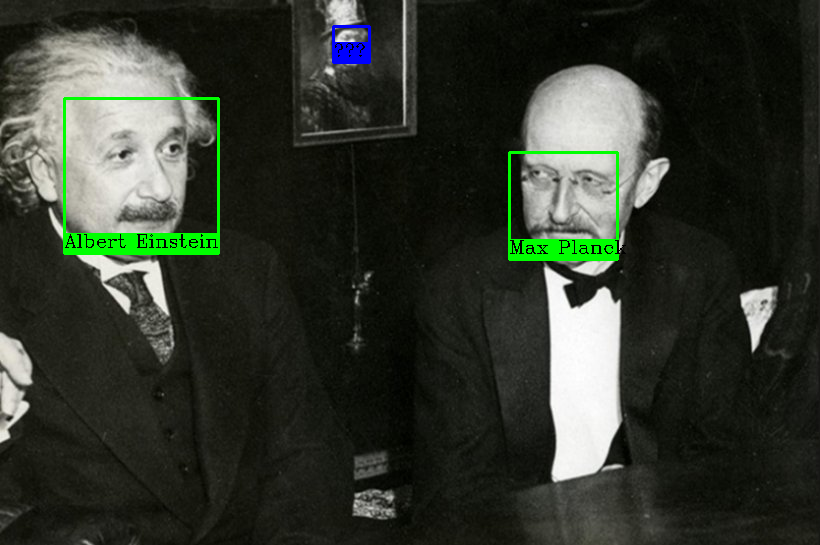

In [15]:
Image.fromarray(img, 'RGB')